<a href="https://colab.research.google.com/github/minseok40231/2025.LLM/blob/main/202021004%EA%B9%80%EB%AF%BC%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 37.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.06MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.52MB/s]


loss is 0.9154497981071472
loss is 0.16440793871879578
loss is 0.1064443439245224
loss is 0.07944275438785553
loss is 0.06583072245121002
loss is 0.055383868515491486
loss is 0.04790730029344559
loss is 0.04350830242037773
loss is 0.03748504817485809
loss is 0.03469938039779663
loss is 0.0307108573615551
loss is 0.027975942939519882
loss is 0.024792218580842018
loss is 0.024003636091947556
loss is 0.021258341148495674
loss is 0.020574679598212242
loss is 0.01866096258163452
loss is 0.017622461542487144
loss is 0.01753966696560383
loss is 0.016671018674969673
loss is 0.01525268517434597
loss is 0.01523036602884531
loss is 0.013780872337520123
loss is 0.012713893316686153
loss is 0.012301512062549591
loss is 0.011584614403545856
loss is 0.011478882282972336
loss is 0.011250742711126804
loss is 0.011094288900494576
loss is 0.010229109786450863
loss is 0.009956342168152332
loss is 0.009287122637033463
loss is 0.009409073740243912
loss is 0.009002957493066788
loss is 0.009103397838771343
lo

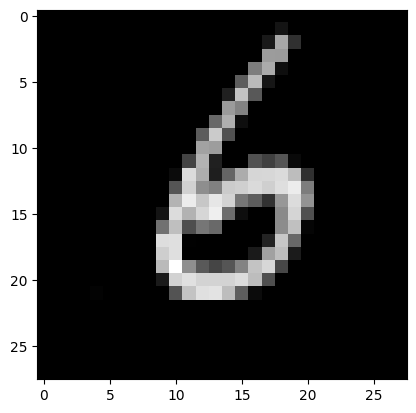

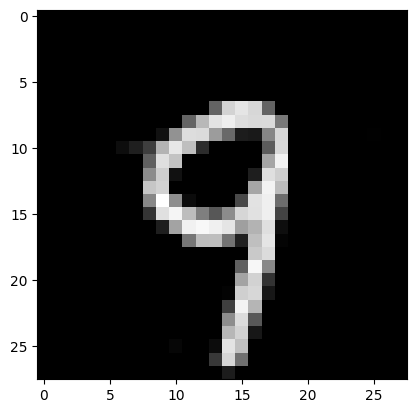

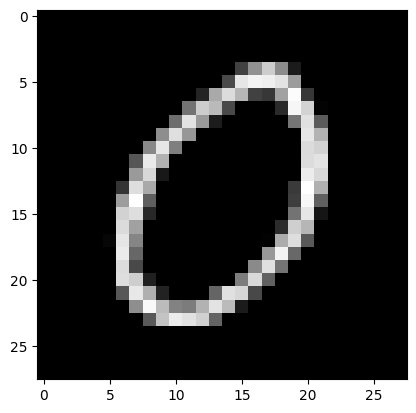

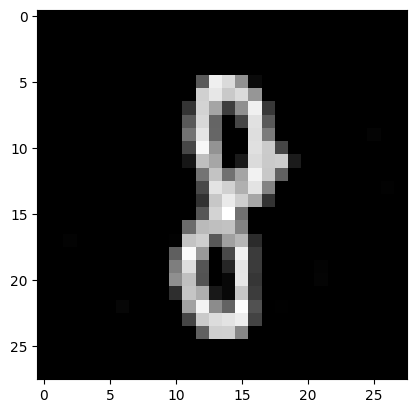

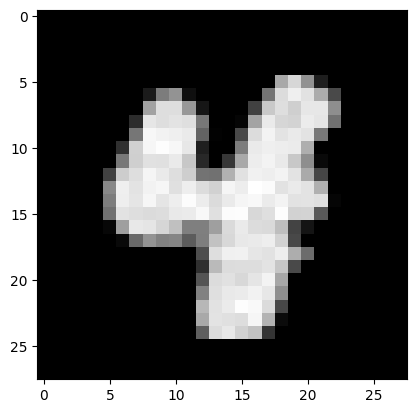

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,16,3,padding=1),   # 16 x 28 x 28
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16,32,3,padding=1),  # 32 x 28 x 28
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32,64,3,padding=1),  # 64 x 28 x 28
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2)              # 64 x 14 x 14
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64,128,3,padding=1),  # 128 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128,256,3,padding=1),  # 256 x 7 x 7
            nn.ReLU()
        )

    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(256,128,3,2,1,1), # 128 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128,64,3,1,1), # 64 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(64,16,3,1,1), # 16 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16,1,3,2,1,1), # 1 x 28 x 28
            nn.ReLU()
        )
    def forward(self,x):
        out = x.view(batch_size,256,7,7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out

mnist_train = dset.MNIST("./data/MNIST", train=True,
transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False,
transform=transforms.ToTensor(), target_transform=None, download=True)

batch_size = 100
train_loader = torch.utils.data.DataLoader(mnist_train,
batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,
batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

num_epoch = 10
Learning_rate = 0.0002
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder().to(device)
decoder = Decoder().to(device)
parameters = itertools.chain(encoder.parameters(), decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=Learning_rate)

for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        optimizer.zero_grad()
        image = image.to(device)
        z = encoder(image)
        output = decoder(z)
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()
        if j % 10 == 0:
            print("loss is", loss.cpu().item())


out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
for i in range(5):
    plt.show()
    plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()